<a href="https://colab.research.google.com/github/dianaislamiyati/Nutrition-Fact-For-McDonald-s-Menu/blob/main/McD_Nutrition_Fact_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A.** **Exploratory Data Analysist**

In [3]:
import numpy as np                      #Import Library Numpy
import pandas as pd                     #Import Library Pandas
import matplotlib.pyplot as plt		      # Import Library Matplotlib untuk data visualization
import seaborn as sns			            	# Import Library Seaborn
import plotly.express as px		        	# Import Library Plotly Express

In [30]:
df = pd.read_csv("../India_Menu.csv")
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


Menyingkirkan huruf "g" yang mengganggu di "Per Serve Size"

In [9]:
for i in range(len(df['Per Serve Size'])):
  df['Per Serve Size'][i] = df['Per Serve Size'][i].split(' ')[0]
# Convert str to number
df["Per Serve Size"] = pd.to_numeric(df["Per Serve Size"])

<ipython-input-9-c596cd1dfacb>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Per Serve Size'][i] = df['Per Serve Size'][i].split(' ')[0]
<ipython-input-9-c596cd1dfacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Memeriksa dan mengisi nilai NaN

In [10]:
print(df.dtypes)			          	# List tipe data setiap kolom

Menu Category              object
Menu Items                 object
Per Serve Size            float64
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object


Mengetahui tipe data dari setiap kolom pada tabel

In [11]:
numerical_data = df.drop(["Menu Category","Menu Items"], axis=1).apply(lambda x: x.fillna(np.mean(x)))
df = df[["Menu Category","Menu Items"]].join(numerical_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    float64
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(11), object(2)
memory usage: 14.4+ KB


Kemudian kita dapat melihat makanan apa yang memiliki banyak protein

In [12]:
df.sort_values('Protein (g)',ascending=0).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,301.0,641.36,39.47,31.51,9.54,0.26,110.37,46.24,9.16,6.32,1906.27
12,Regular Menu,Chicken Maharaja Mac,296.0,689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71
109,Gourmet Menu,McSpicy Premium Chicken Burger,264.5,622.25,31.49,34.65,15.55,0.24,302.61,43.60,6.07,2.64,1614.88
107,Gourmet Menu,Chicken Cheese Lava Burger,307.0,834.36,27.37,45.18,17.00,0.27,73.11,76.03,16.75,10.01,1745.04
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,325.0,720.30,26.91,29.20,5.08,0.30,31.32,77.47,3.28,0.35,2399.49


Menambahkan Kolom Persentase Protein, Lemak, dan Karbohidrat

In [13]:
# 4 calories per gram of Protein/Carb, 9 calories per gram of Fat
df["Percent Protein (%)"] = np.round(((df["Protein (g)"] * 4.0) / df["Energy (kCal)"]) * 100.0, 2)
df["Percent Fat (%)"] = np.round(((df["Total fat (g)"] * 9.0) / df["Energy (kCal)"]) * 100.0, 2)
df["Percent Carbs (%)"] = np.round(((df["Total carbohydrate (g)"] * 4.0) / df["Energy (kCal)"]) * 100.0, 2)

In [14]:
protein_percents = df.sort_values("Percent Protein (%)",ascending=0)
protein_percents

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Percent Protein (%),Percent Fat (%),Percent Carbs (%)
40,Breakfast Menu,Sausage Mc Muffin with egg,157.0,290.42,22.46,15.94,8.08,0.22,264.80,28.87,2.61,0.75,804.04,30.93,49.40,39.76
19,Regular Menu,McSpicy Fried Chicken 1 pc,115.0,248.76,17.33,14.29,2.82,0.06,31.11,12.70,0.58,0.00,873.89,27.87,51.70,20.42
75,McCafe Menu,Strawberry Green Tea (L),456.0,11.49,0.78,0.46,0.46,0.46,4.56,4.56,2.28,0.00,23.76,27.15,36.03,158.75
74,McCafe Menu,Strawberry Green Tea (R),330.0,8.32,0.56,0.33,0.33,0.33,3.30,3.30,1.65,0.00,17.19,26.92,35.70,158.65
73,McCafe Menu,Strawberry Green Tea (S),279.0,7.03,0.47,0.28,0.28,0.28,2.79,2.79,1.40,0.00,14.54,26.74,35.85,158.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Beverages Menu,Large Coca-Cola,544.0,217.36,0.00,0.00,0.00,0.00,0.00,54.34,54.34,54.34,41.99,0.00,0.00,100.00
116,Beverages Menu,Medium Coca-Cola,394.0,151.36,0.00,0.00,0.00,0.00,0.00,37.84,37.84,37.84,29.24,0.00,0.00,100.00
115,Beverages Menu,Small Coca-Cola,299.0,109.56,0.00,0.00,0.00,0.00,0.00,27.39,27.39,27.39,21.17,0.00,0.00,100.00
122,Beverages Menu,Medium Thums-up,394.0,137.60,0.00,0.00,0.00,0.00,0.00,34.40,34.40,34.40,34.74,0.00,0.00,100.00


Kita lihat bahwa Sausage Mc Muffin dengan telur memiliki persentase protein tertinggi dari semua pilihan, lebih dari 30%!!!

Mari kita lihat item yang memiliki persentase protein tertinggi yang juga memiliki setidaknya 10,0g protein


In [15]:
protein_percents[protein_percents["Protein (g)"] >= 10.0].iloc[:10, [1, 2, 3, 4, 5, 9, -3, -2, -1]]

,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Total carbohydrate (g),Percent Protein (%),Percent Fat (%),Percent Carbs (%)
40,Sausage Mc Muffin with egg,157.0,290.42,22.46,15.94,28.87,30.93,49.40,39.76
19,McSpicy Fried Chicken 1 pc,115.0,248.76,17.33,14.29,12.70,27.87,51.70,20.42
24,3 piece Chicken Strips,87.0,246.65,15.26,18.57,4.02,24.75,67.76,6.52
25,5 piece Chicken Strips,145.0,411.09,25.43,28.54,0.73,24.74,62.48,0.71
23,2 piece Chicken Strips,58.0,164.44,10.17,12.38,2.68,24.74,67.76,6.52
108,Chunky Chipotle American Burger Chicken,301.0,641.36,39.47,31.51,46.24,24.62,44.22,28.84
21,6 piece Chicken McNuggets,96.0,254.52,15.04,14.30,15.74,23.64,50.57,24.74
22,9 piece Chicken McNuggets,144.0,381.77,22.56,21.46,23.62,23.64,50.59,24.75
20,4 piece Chicken McNuggets,64.0,169.68,10.03,9.54,10.50,23.64,50.60,24.75
111,Piri piri Mc Spicy Chicken Burger,228.0,443.40,25.63,17.30,43.29,23.12,35.12,39.05


Dan makanan yang mengandung setidaknya 20,0g protein dan tidak terlalu banyak sodium (kurang dari 1000,0 mg)

In [16]:
df[(df["Sodium (mg)"] <= 1000.0) & (df["Protein (g)"] >= 20.0)]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Percent Protein (%),Percent Fat (%),Percent Carbs (%)
10,Regular Menu,Mc Spicy Chicken Burger,186.0,451.92,21.46,19.36,7.63,0.18,66.04,46.08,5.88,4.49,928.520000,18.99,38.56,40.79
22,Regular Menu,9 piece Chicken McNuggets,144.0,381.77,22.56,21.46,10.02,0.14,55.48,23.62,0.72,0.00,704.810000,23.64,50.59,24.75
40,Breakfast Menu,Sausage Mc Muffin with egg,157.0,290.42,22.46,15.94,8.08,0.22,264.80,28.87,2.61,0.75,804.040000,30.93,49.40,39.76
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228.0,443.40,25.63,17.30,4.01,0.19,64.19,43.29,9.29,6.32,362.064143,23.12,35.12,39.05


Kita dapat melihat grafik korelasi antara Total Carbohydrate, Protein dan Fat dan Cholesterol, Total Sugar, dan Sodium.

<Figure size 1200x1000 with 0 Axes>

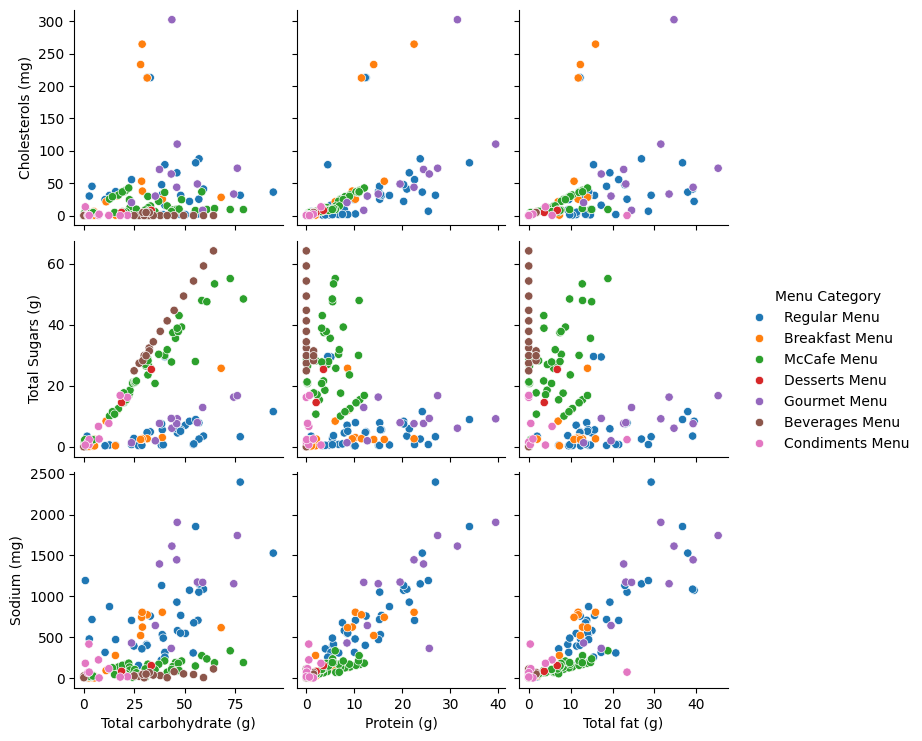

In [17]:
plt.figure(figsize=(12,10))
sns.pairplot(df, hue="Menu Category", x_vars=["Total carbohydrate (g)", "Protein (g)", "Total fat (g)"], y_vars=["Cholesterols (mg)", "Total Sugars (g)", "Sodium (mg)"], )

<Axes: >

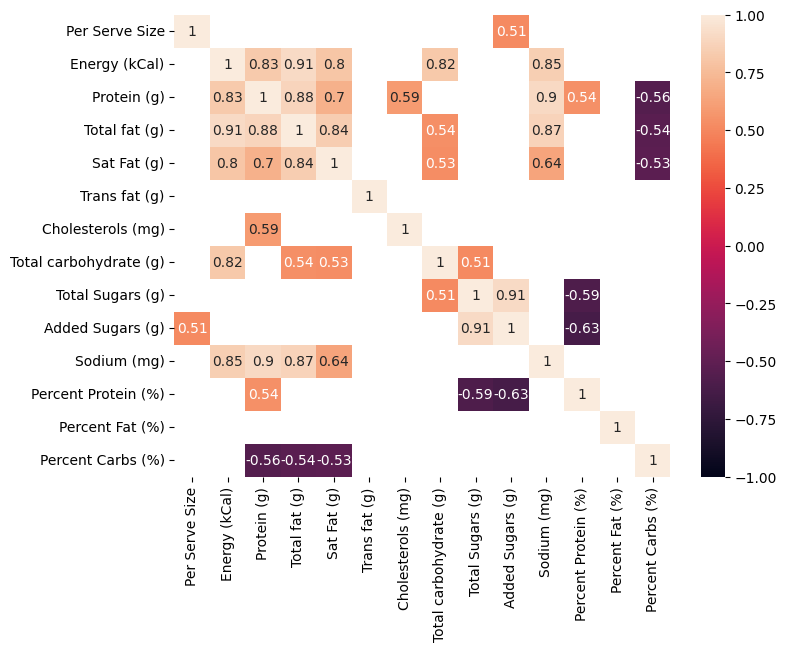

In [18]:
corr = df.drop(["Menu Category", "Menu Items"], axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=corr[(corr >= 0.5) | (corr <= -0.5)], annot=True, vmin=-1.0, vmax=1.0)

Diperoleh :

* Semakin banyak lemak dan protein yang dimiliki suatu makanan, semakin banyak natrium yang dikandungnya, tidak termasuk minuman.

* Semakin banyak protein yang dimiliki suatu makanan, semakin banyak kolesterol yang dikandungnya, tidak termasuk minuman.

* Kandungan lemak dan protein saling berkorelasi kuat, semakin banyak lemak yang dimiliki suatu makanan, semakin banyak protein yang dikandungnya, dan sebaliknya.

* Menu dengan kolesterol paling banyak adalah menu Sarapan, kemungkinan besar karena telur.

* Semakin banyak karbohidrat yang dimiliki suatu makanan pada Menu McCafe atau Minuman, semakin banyak gula total yang dikandungnya. Karena makanan ini adalah minuman manis, hal ini masuk akal.

Beberapa Scatterplot untuk lebih memperkuat temuan saya

In [19]:
px.scatter(data_frame=df, x="Protein (g)", y="Total fat (g)", size="Sodium (mg)", hover_name="Menu Items", color="Menu Category", template="simple_white")

Kita dapat melihat bahwa seiring meningkatnya kandungan protein dan lemak, lingkarannya pun semakin membesar, yang menunjukkan kandungan natrium semakin tinggi, dan memperkuat apa yang kita amati di atas.

In [20]:
px.scatter(data_frame=df, x="Total carbohydrate (g)", y="Total Sugars (g)", size="Energy (kCal)", color="Menu Category", hover_name="Menu Items", template="simple_white")

Di atas kita dapat melihat lebih jelas sedikit korelasi antara kandungan karbohidrat dan kandungan gula total, terutama untuk Menu Minuman dan McCafe.

## sekarang dengan beberapa diagram kotak untuk menemukan item menu mana yang memiliki profil makronutrien terbaik

In [21]:
px.box(data_frame=df, y="Energy (kCal)", x="Menu Category", color="Menu Category", hover_name="Menu Items", hover_data=["Total carbohydrate (g)", "Protein (g)", "Total fat (g)"], points="all")

Hasil observasi:

* Menu Gourmet memiliki jumlah kalori rata-rata tertinggi, lebih dari 200 kalori lebih tinggi daripada menu biasa. Hal ini disebabkan oleh item yang memiliki kandungan nutrisi makro yang lebih tinggi dan oleh fakta bahwa tidak ada item minuman pada menu, yang biasanya lebih rendah kalori.

* Menu Biasa memiliki rentang kalori yang sangat luas karena mencakup item mulai dari minuman rendah kalori hingga makanan dengan kandungan nutrisi makro yang tinggi.

In [22]:
px.box(data_frame=df, y="Total fat (g)", x="Menu Category", color="Menu Category", hover_name="Menu Items", hover_data=["Energy (kCal)", "Percent Fat (%)", "Trans fat (g)"], points="all")

Hasil:

* Menu Gourmet memiliki kadar lemak rata-rata tertinggi, hampir dua kali lipat kadar lemak rata-rata tertinggi kedua pada Menu Reguler.
* Menu Sarapan mempertahankan kadar lemak rata-rata sekitar 10,0 gram, yang tidak buruk.
* Sebagian besar minuman (jelas) dan bumbu mengandung sedikit atau tidak mengandung lemak sama sekali.
* Mungkin ada beberapa informasi yang dimasukkan secara tidak benar, karena ada Bumbu ("Sachet Saus Tomat") yang mengandung 23,45 gram lemak.

In [23]:
px.box(data_frame=df, y="Protein (g)", x="Menu Category", color="Menu Category", hover_name="Menu Items", hover_data=["Energy (kCal)", "Percent Protein (%)", "Percent Fat (%)"], points="all")

Hasil:
* Menu Gourmet memiliki kandungan Protein rata-rata hampir dua kali lipat dari Menu Reguler.
* Ada minuman pada Menu McCafe yang mengandung lebih dari 10,0 gram Protein.
* Sebagian besar item dengan kandungan Protein tertinggi juga mengandung hampir 50% kandungan Lemak.

In [24]:
px.box(data_frame=df, y="Total carbohydrate (g)", x="Menu Category", color="Menu Category", hover_data=["Menu Items", "Energy (kCal)", "Total Sugars (g)"], points="all")

Kesimpulan
* McDonald's India adalah restoran yang kurang baik untuk mendapatkan Protein dalam jumlah sedang tanpa juga mendapatkan Lemak dalam jumlah sedang. Restoran ini mungkin cocok bagi mereka yang ingin menambah berat badan dan otot dan/atau individu yang tidak memiliki akses ke toko kelontong atau sarana untuk memasak makanan mereka sendiri.
* Pilihan sarapan yang relatif rendah kalori bagi mereka yang ingin mendapatkan sekitar 33 gram Protein adalah "Sausage Mc Muffin with egg" dan "Flat White (R)"

In [25]:
low_cal = pd.DataFrame(df.iloc[np.where((df["Menu Items"] == 'Sausage Mc Muffin with egg') | (df["Menu Items"] == 'Flat White (R)'))])
low_cal.drop(["Menu Category", "Per Serve Size", "Sat Fat (g)", "Trans fat (g)", "Added Sugars (g)", "Percent Protein (%)", "Percent Fat (%)", "Percent Carbs (%)"], axis=1, inplace=True)
low_cal_sums = pd.DataFrame(low_cal.sum(axis=0, numeric_only=True)).transpose()

pd.concat([low_cal, low_cal_sums], axis=0)

,Menu Items,Energy (kCal),Protein (g),Total fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Sodium (mg)
40,Sausage Mc Muffin with egg,290.42,22.46,15.94,264.80,28.87,2.61,804.04
56,Flat White (R),215.72,10.36,12.02,36.48,19.08,14.41,154.98
0,NaN,506.14,32.82,27.96,301.28,47.95,17.02,959.02


* Perhatikan bahwa yang kita eliminasi di sini adalah jumlah Kolesterol, karena kita memilih makanan yang mengandung telur.
* Pilihan kalori menengah yang baik adalah "Piri piri Mc Spicy Chicken Burger", yang mengandung sekitar 25,5 gram protein, dan kandungan karbohidrat lebih banyak serta kandungan kolesterol lebih sedikit daripada pilihan kalori rendah di atas. Jika dipasangkan dengan "Flat White (R)", kita mendapatkan sekitar 36 gram protein

In [26]:
med_cal = pd.DataFrame(df.iloc[np.where((df["Menu Items"] == 'Piri piri Mc Spicy Chicken Burger') | (df["Menu Items"] == 'Flat White (R)'))])
med_cal.drop(["Menu Category", "Per Serve Size", "Sat Fat (g)", "Trans fat (g)", "Added Sugars (g)", "Percent Protein (%)", "Percent Fat (%)", "Percent Carbs (%)"], axis=1, inplace=True)
med_cal_sums = pd.DataFrame(med_cal.sum(axis=0, numeric_only=True)).transpose()

pd.concat([med_cal, med_cal_sums], axis=0)

,Menu Items,Energy (kCal),Protein (g),Total fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Sodium (mg)
56,Flat White (R),215.72,10.36,12.02,36.48,19.08,14.41,154.980000
111,Piri piri Mc Spicy Chicken Burger,443.40,25.63,17.30,64.19,43.29,9.29,362.064143
0,NaN,659.12,35.99,29.32,100.67,62.37,23.70,517.044143


* Perhatikan bahwa nilai Sodium awalnya adalah NaN untuk "Piri piri Mc Spicy Chicken Burger", jadi nilainya kemungkinan besar lebih tinggi dalam kenyataan, karena 362 mg sodium tampaknya rendah.
* Jika Anda memiliki lebih banyak kalori dalam diet Anda, "Chunky Chipotle American Burger Chicken" dari Gourmet Menu juga merupakan pilihan yang baik. Dipasangkan dengan "Flat White (R)" kita mendapatkan makanan dengan hampir 50 gram protein!

In [27]:
high_cal = pd.DataFrame(df.iloc[np.where((df["Menu Items"] == 'Chunky Chipotle American Burger Chicken') | (df["Menu Items"] == 'Flat White (R)'))])
high_cal.drop(["Menu Category", "Per Serve Size", "Sat Fat (g)", "Trans fat (g)", "Added Sugars (g)", "Percent Protein (%)", "Percent Fat (%)", "Percent Carbs (%)"], axis=1, inplace=True)
high_cal_sums = pd.DataFrame(high_cal.sum(axis=0, numeric_only=True)).transpose()

pd.concat([high_cal, high_cal_sums], axis=0)

,Menu Items,Energy (kCal),Protein (g),Total fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Sodium (mg)
56,Flat White (R),215.72,10.36,12.02,36.48,19.08,14.41,154.98
108,Chunky Chipotle American Burger Chicken,641.36,39.47,31.51,110.37,46.24,9.16,1906.27
0,NaN,857.08,49.83,43.53,146.85,65.32,23.57,2061.25


## Hal yang kami eliminasi dalam hidangan ini adalah kadar Natrium, karena sandwich yang kami pilih mengandung 1900 mg Natrium, sebaiknya minum air putih sebelum menyantapnya.